# Homework №1

### <center>Group project name: *{Put name here}*</center>

### Guidelines:

* **Type of layouts:** Spring layout, Circular layout, Spectral layout  
    

* **Key graph metrics:** density, diameter, center, radius, degree


* Output some **interesting facts** from network: different centralities vizualization


* **Community detection:**: Louvain algorithm and Synchronous label propagation 



In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
from Selector import Selector
from Tablecreator import TableCreator
from Inserter import Inserter
from IPython.display import Image
import pylab
import collections as cl

import warnings
warnings.filterwarnings('ignore')

In [2]:
def create_df_authors(DB_name):
    testDB = Selector(DB_name)
    df = testDB.make_df_authors()
    testDB.closeConnect()
    return df

def create_df_authors_for_year(DB_name, year):
    testDB = Selector(DB_name)
    df = testDB.make_df_for_year(year)
    testDB.closeConnect()
    return df

def create_graph_from_pandas_df(df):
    """ Takes pandas dataframe and create networkx graph. We suggest every row in df
        is an article with next columns: 'list of authors' (list of strings)
    """
    G = nx.Graph()
    
    for num, row in df.iterrows():
        authors_list = row['authors_list']
        # connect every one and update edges
        for i in range(len(authors_list)):
            for j in range(i + 1, len(authors_list)):
                from_, to_ = authors_list[i], authors_list[j]
                new_weight = (G[from_][to_]['weight'] if G.has_edge(from_, to_) else 0) + 1
                G.add_edge(from_, to_, weight=new_weight)
        
    return G 

In [3]:
name = 'test.db'
df = create_df_authors_for_year(name, 2015)
G = create_graph_from_pandas_df(df)

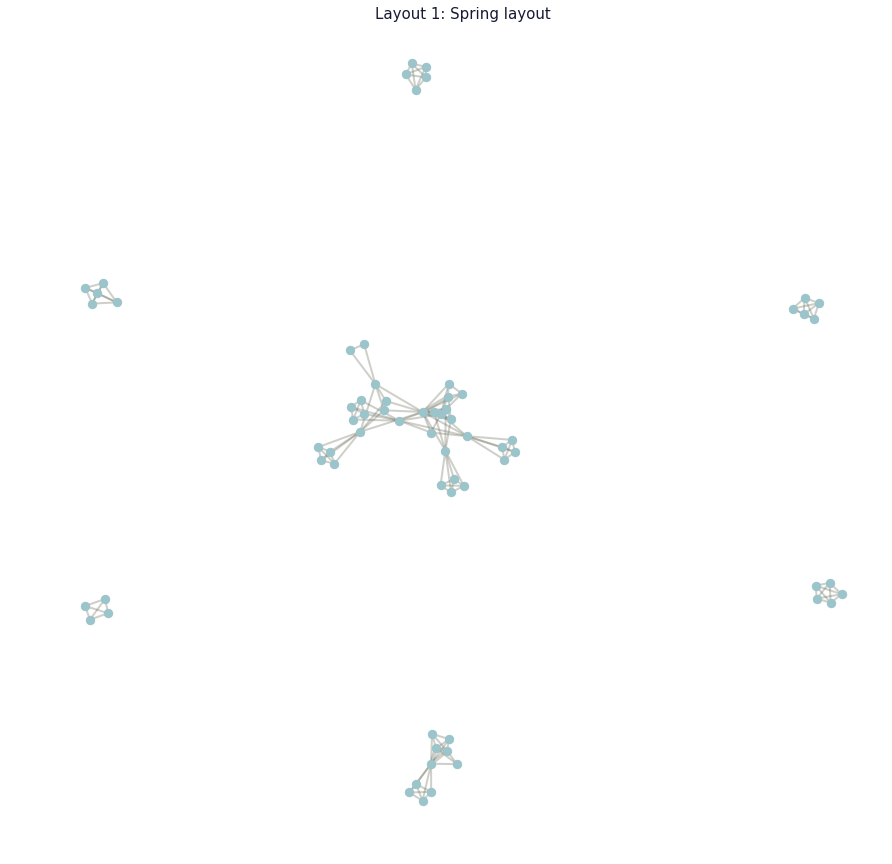

There are  68  nodes in the graph
There are  152 edges in the graph


In [4]:
# labels = nx.get_edge_attributes(G,'weight')

weights = nx.get_edge_attributes(G,'weight')
widths = [weights[i]*2 for i in G.edges()]

pos = nx.spring_layout(G)

plt.figure(figsize=(15, 15))
plt.title('Layout 1: Spring layout', color="#161B33", fontsize=15)
edges_ = nx.draw_networkx_edges(G, pos, width=widths, edge_color='#5F634F', alpha=0.3)
nodes_ = nx.draw_networkx_nodes(G, pos, node_size=70, node_color='#9BC4CB')
# nx.draw_networkx_labels(G, pos, font_size=5)
plt.axis('off')
plt.show()

v = len(G.nodes())
e = len(G.edges())
print('There are ', v, ' nodes in the graph')
print('There are ', e, 'edges in the graph')

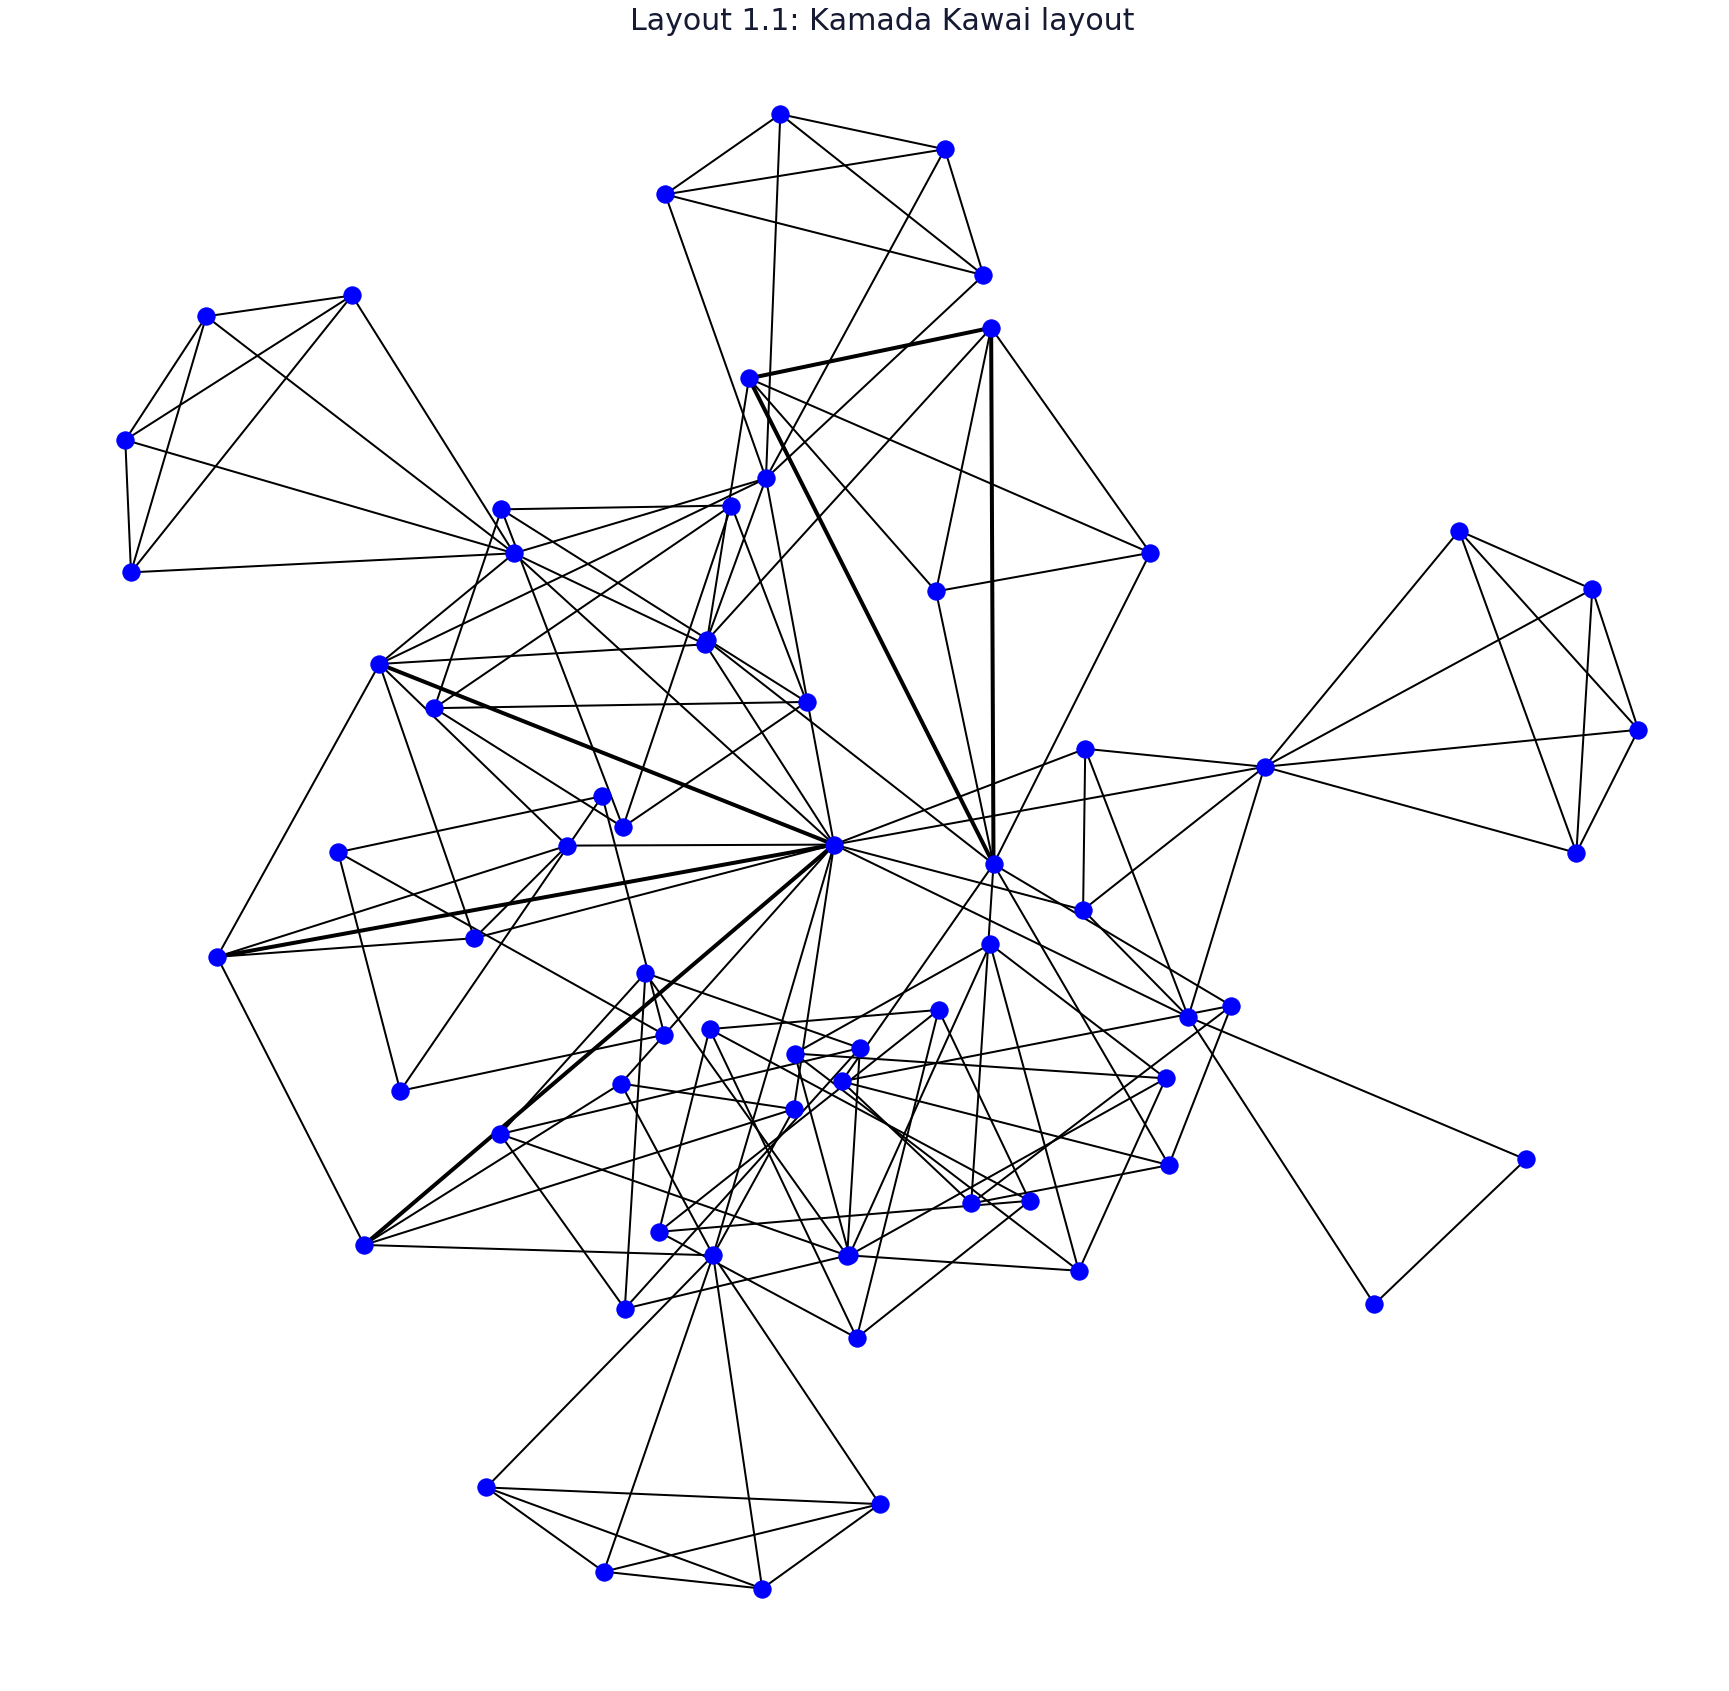

In [18]:
plt.figure(figsize=(30, 30))
colors = 'blue'
layout = nx.kamada_kawai_layout(G)
weights = nx.get_edge_attributes(G,'weight')
widths = [weights[i]*2 for i in G.edges()]
nx.draw_networkx_edges(G, pos=layout, width=widths)
nx.draw_networkx_nodes(G, pos=layout, node_color=colors)
plt.title('Layout 1.1: Kamada Kawai layout', fontsize = 30, color="#161B33")
plt.axis('off')
plt.show()

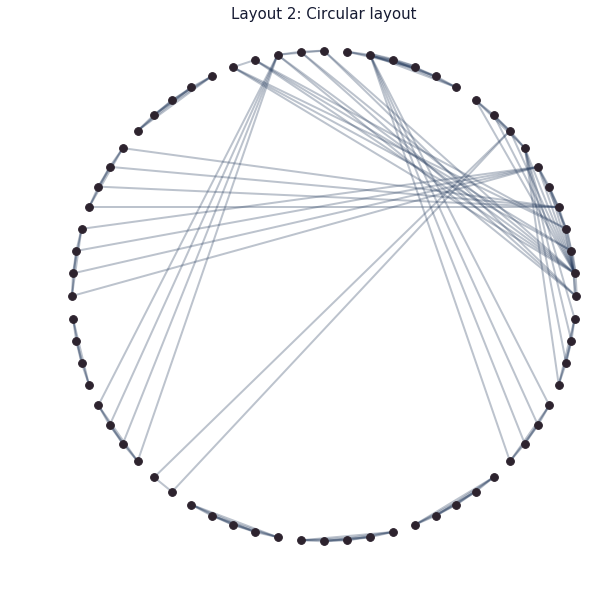

In [5]:
pos = nx.circular_layout(G)

plt.figure(figsize=(10, 10))
plt.title('Layout 2: Circular layout', color="#161B33", fontsize=15)
edges_ = nx.draw_networkx_edges(G, pos, width=widths, edge_color='#23395B', alpha=0.3)
nodes_ = nx.draw_networkx_nodes(G, pos, node_color='#2D232E', node_size=60)
plt.axis('off')
plt.show()

In [31]:
from networkx.drawing.nx_agraph import graphviz_layout

In [32]:
plt.figure(figsize=(30, 30))
colors = 'green'
layout = graphviz_layout(G)
weights = nx.get_edge_attributes(G,'weight')
widths = [weights[i]*2 for i in G.edges()]
nx.draw_networkx_edges(G, pos=layout, width=widths)
nx.draw_networkx_nodes(G, pos=layout, node_color=colors)
plt.title('Layout 3: Kamada Kawai layout', fontsize = 30, color="#161B33")
plt.axis('off')
plt.show()

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

<Figure size 2160x2160 with 0 Axes>

In [7]:
nx.is_connected(G)

False

In [147]:
components_ = [len(c) for c in nx.connected_components(G)]
print('There are ', len(components_), ' connected components in the graph')
print('Size of the components: ', components_)

There are  7  connected components in the graph
Size of the components:  [34, 5, 10, 5, 5, 4, 5]


#### Radius

In [148]:
for i in nx.connected_component_subgraphs(G):
    diameters = nx.radius(i) 
    print(diameters)

2
1
1
1
1
1
1


#### Diameter

In [149]:
for i in nx.connected_component_subgraphs(G):
    diameters = nx.diameter(i) 
    print(diameters)

4
1
2
1
1
1
1


#### Center

In [150]:
for i in nx.connected_component_subgraphs(G):
    cnt = nx.center(i)
    print(cnt) 

['Jelka Pleadin']
['Monika Kovačević', 'Ivana Jurčević', 'Lidija Barišić', 'Klara Kraljić', 'Dubravka Škevin']
['Vida Šimat']
['Jurica Zucko', 'Mirjana Najdek Dragić', 'Marino Korlević', 'Sandi Orlić', 'Maria Blažina']
['Paul F. Long', 'Ana M. Moura-da-Silva', 'John Cullum', 'Antonio Starcevic', 'Daslav Hranueli']
['Daniele Milone', 'Gianfranco Rizzo', 'Giorgia Peri', 'Salvatore Pitruzzella']
['Nino Pinter', 'Lidija Kozačinski', 'Željka Cvrtila Fleck', 'Bela Njari', 'Nadica Maltar-Strmečki']


#### Density

In [151]:
print('Density of the graph is ', nx.density(G), '\n')

print('Density of each component is:')
for i in nx.connected_component_subgraphs(G):
    den = nx.density(i)
    print(den)


Density of the graph is  0.06672519754170325 

Density of each component is:
0.14795008912655971
1.0
0.5111111111111111
1.0
1.0
1.0
1.0


#### Degree

In [152]:
degrees = [val for (node, val) in G.degree()]
degreeCount = cl.Counter(degrees)
deg, cnt = zip(*degreeCount.items())

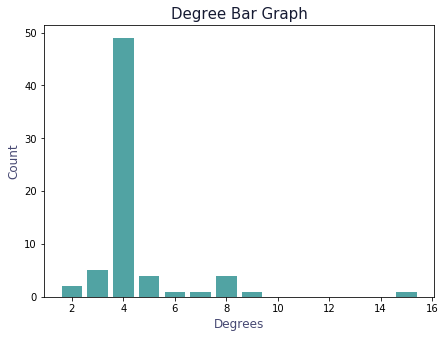

In [153]:
plt.figure(figsize=(7,5))
plt.title("Degree Bar Graph", color="#161B33", fontsize=15)
plt.bar(deg, cnt, color='#51A3A3')
plt.xlabel("Degrees", color="#474973", fontsize=12)
plt.ylabel("Count", color="#474973", fontsize=12)
plt.show()

### Interesting facts 

In [154]:
print('Average Clustering Coefficient: ', nx.average_clustering(G))

Average Clustering Coefficient:  0.9173436041083098


#### Let's count some centralities

('Jelka Pleadin', 0.22388059701492538)


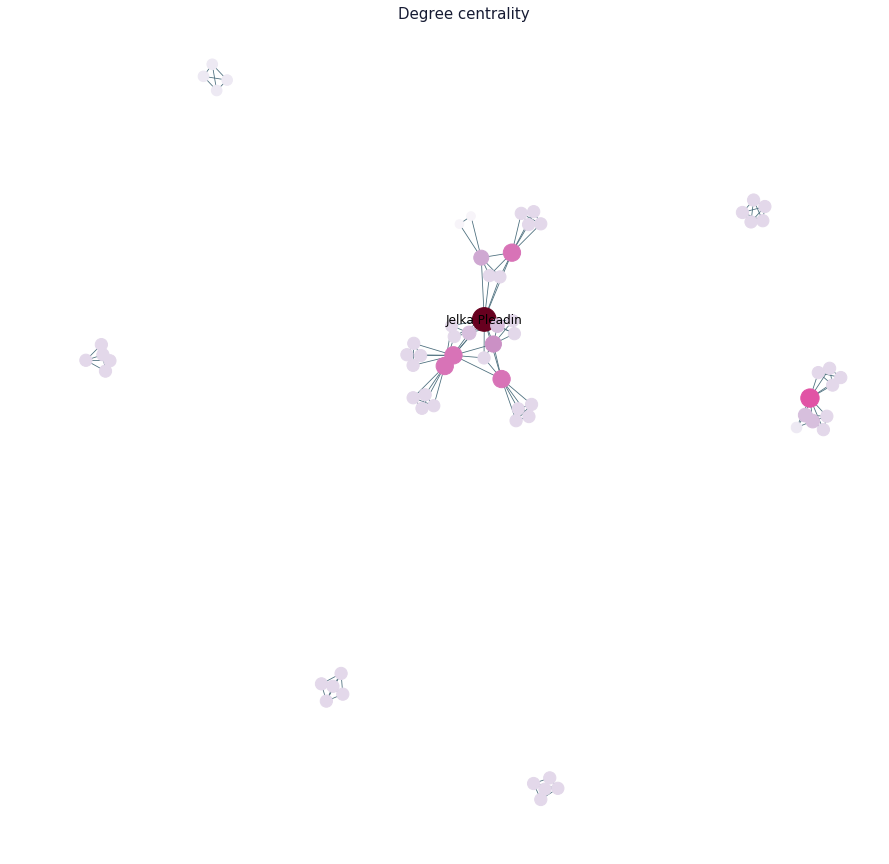

In [155]:
# Degree centrality 
# counts as the number of nearest neighbors

pos = nx.spring_layout(G)
lab={'Jelka Pleadin': 'Jelka Pleadin'}

dc = nx.degree_centrality(G)
nx.set_node_attributes(G, dc, "dc")
gg1 = np.array(list(nx.get_node_attributes(G, "dc").values())).astype(dtype=float)

plt.figure(1, figsize=(15,15))
plt.title("Degree centrality", color="#161B33", fontsize=15)
nx.draw(G, pos,
          nodelist=dc.keys(),
          labels=lab,
          node_size = [d*2500 for d in gg1],
          node_color=gg1,
          cmap=plt.cm.PuRd, width=0.8, edge_color='#4A6D7C')

pr1 = sorted(dc.items(), key=lambda x: x[1], reverse=True)
print('The most valuable node: '.join(str(p) for p in pr1[:1]))


('Jelka Pleadin', 0.22388059701492538)


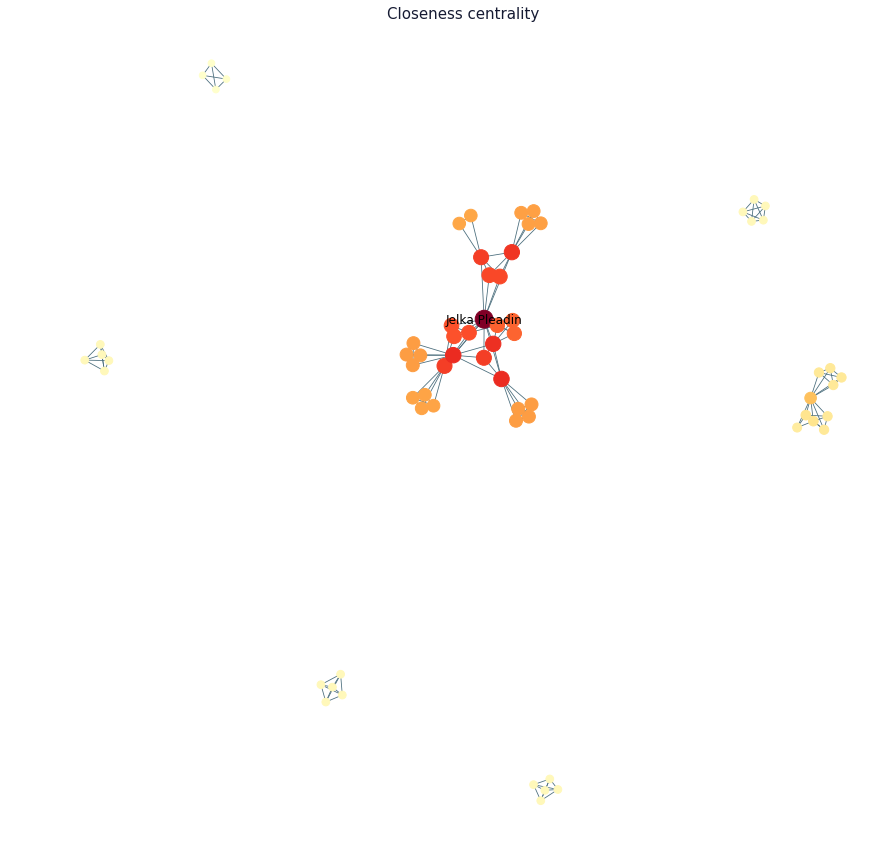

In [156]:
# Closeness centrality
# counts as how close the node is to all other nodes in network

cl = nx.closeness_centrality(G)
nx.set_node_attributes(G, cl, "cl")
gg2 = np.array(list(nx.get_node_attributes(G, "cl").values())).astype(dtype=float)

plt.figure(1, figsize=(15,15))
plt.title("Closeness centrality", color="#161B33", fontsize=15)
nx.draw(G, pos,
          nodelist=dc.keys(),
          labels=lab,
          node_size = [d*1000 for d in gg2],
          node_color=gg2,
          cmap=plt.cm.YlOrRd, width=0.8, edge_color='#4A6D7C')

cl1 = sorted(dc.items(), key=lambda x: x[1], reverse=True)
print('The most valuable node: '.join(str(p) for p in cl1[:1]))

('Jelka Pleadin', 0.22388059701492538)


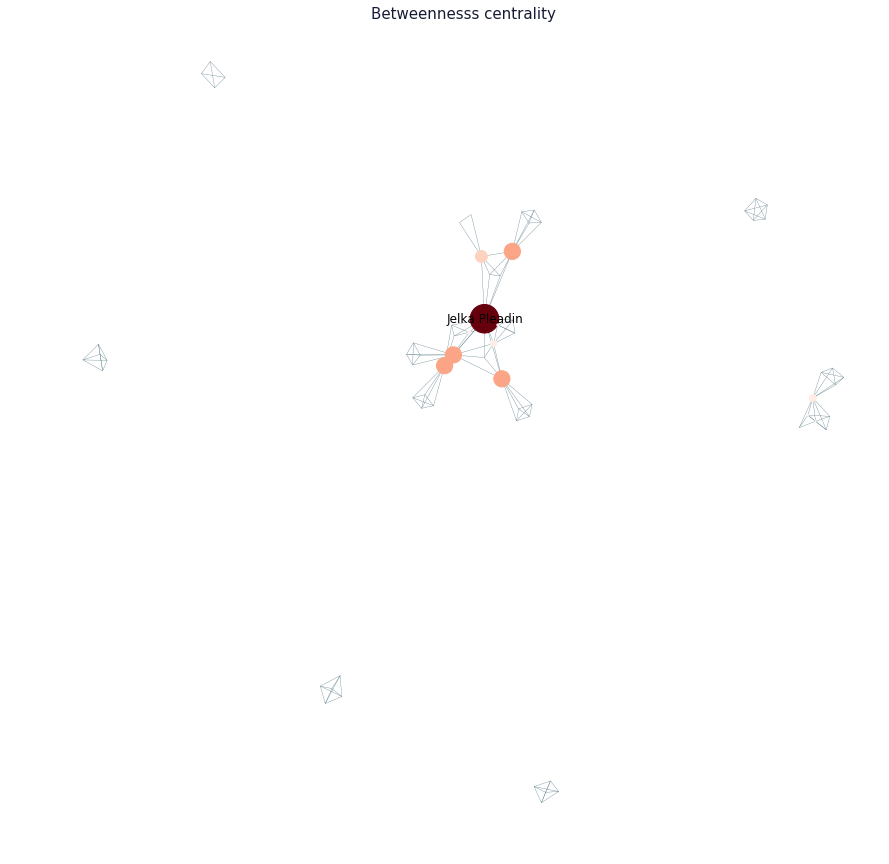

In [157]:
# Betweenness centrality
# counts as the number of shortest paths going through the node 

bt = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bt, "bt")
gg3 = np.array(list(nx.get_node_attributes(G, "bt").values())).astype(dtype=float)

plt.figure(1, figsize=(15,15))
plt.title("Betweennesss centrality", color="#161B33", fontsize=15)
nx.draw(G, pos,
          nodelist=dc.keys(),
          labels=lab,
          node_size = [d*5000 for d in gg3],
          node_color=gg3,
          cmap=plt.cm.Reds, width=0.3, edge_color='#4A6D7C')

bt1 = sorted(dc.items(), key=lambda x: x[1], reverse=True)
print('The most valuable node: '.join(str(p) for p in bt1[:1]))

In all three cases the node with the highest value is clearly visible - author Jelka Pleadin. This author has the largest number of publications in co-authorship. 

Let's compare with Page Rank:

In [158]:
#  Node rank depends on ranks of directly connected nodes

pr = sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True)
print('Page-Rank')
print(''.join(str(p) for p in pr[:1]))

Page-Rank
('Jelka Pleadin', 0.04422379447424661)


Again the same person.

### Communities

In [159]:
from networkx.algorithms.community import *

pos = nx.spring_layout(G)
color = ['#EE6352', '#D4E4BC', '#87CBAC', '#3A405A', '#98DFEA', '#EBBAB9', '#109648', '#484349', '#8AF3FF', '#BEB2C8', '#EEC584', '#772D8B']

__Louvain algorithm__

The algorithm has high speed and rather good quality.

In our case one community is not detected at all. 

There are  10  communities


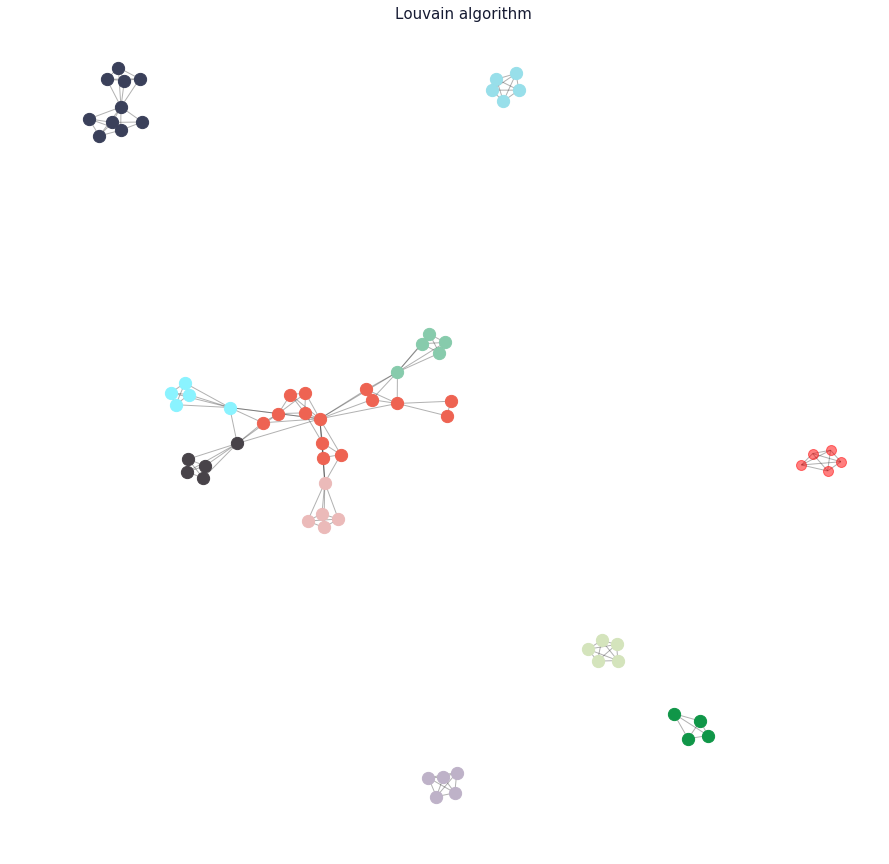

In [160]:
import community

part = community.best_partition(G)
com_count = max([i for i in part.values()])

communities = []
for i in range(com_count):
    communities.append([key for key, item in part.items() if item == i])    

print('There are ', len(communities) , ' communities')
plt.figure(figsize=(15,15))
plt.title('Louvain algorithm', color="#161B33", fontsize=15)

nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, alpha=0.5, node_size=100)

for num, i in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=i, node_color=color[num], with_labels=False, node_size=150)
    
plt.axis('off')
plt.show()


__Synchronous label propagation__

The best algorithm in our case. All communities are correct. 

In general, the probability of giving an incorrect result is almost equal to zero and even if there's a mistake, it's insignificant.

There are  12  communities


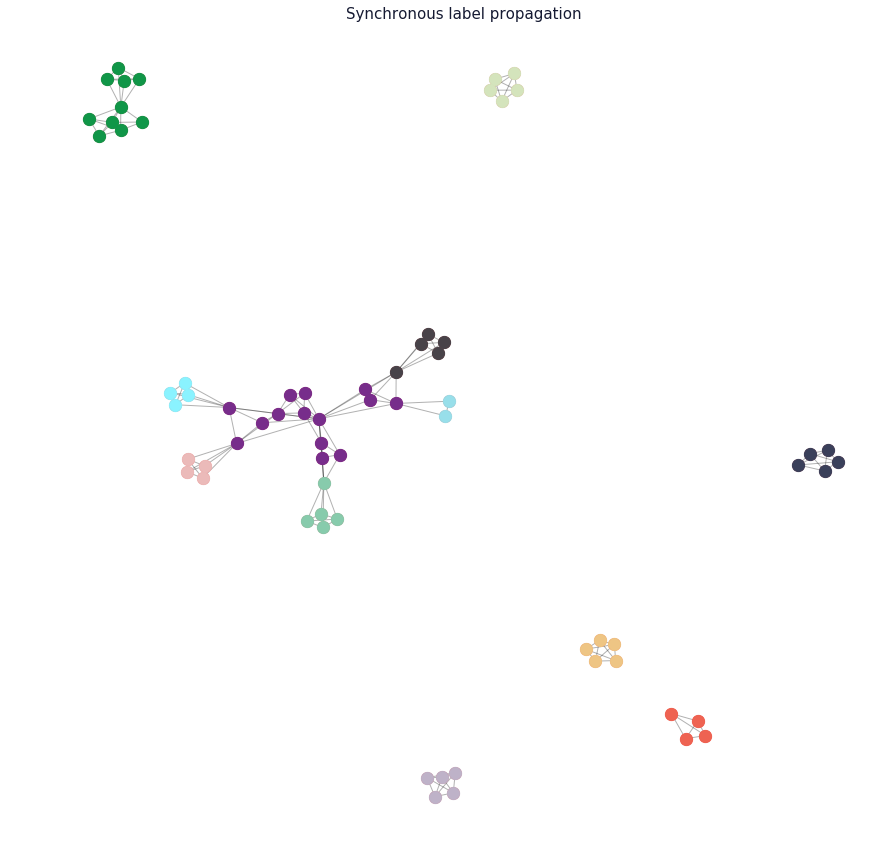

In [161]:
async_com = [i for i in label_propagation_communities(G)]


print('There are ', len(list(async_com)) , ' communities')
plt.figure(figsize=(15,15))
plt.title('Synchronous label propagation', color="#161B33", fontsize=15)
nx.draw_networkx_edges(G, pos, alpha=0.3)

all_nodes = nx.draw_networkx_nodes(G, pos, alpha=0.5, node_size=140)
for i in range(len(list(async_com))):
    nx.draw_networkx_nodes(list(async_com[i]), pos, nodelist=list(async_com[i]), node_color=color[i], node_size=150)

plt.axis('off')
plt.show()
